In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
from src.dataset import *
from src.concept_vectors import *
from src.util import *
from src.hierarchy import *
from src.metrics import *
import numpy as np
import matplotlib.pyplot as plt
import glob
import keras.backend as K
from keras.applications import VGG16

2023-03-02 12:01:00.254129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
dataset = CUB_Dataset()

In [5]:
seed = 42
suffix = ""
attributes = dataset.get_attributes()

## Explore CEM models

In [8]:
all_concepts_2 = {}
all_concepts = {}
for attribute in attributes:
    attribute_index = attributes.index(attribute)
    all_concepts[attribute] = load_cem_vectors(dataset.experiment_name,attribute_index,seed,dataset_location="results/cem_concepts")
    all_concepts_2[attribute] = load_cem_vectors(dataset.experiment_name,attribute_index,seed,dataset_location="results/cem_concepts_2")

In [12]:
len(all_concepts)

112

In [10]:
def load_cem_stratified_vectors_simple(attribute,dataset,suffix,seed=-1):
    """Simplified call to create vector from cub/mnist that is standardized across embeddings
    
    Arguments:
        attribute: Which concept we're looking to get vectors for, as a string
        dataset: Object from the dataset class
        suffix: String; which specific instance of the dataset are we testing out 
    
    Returns: 
        Numpy array of label-based vectors
    """
    
    all_attributes = dataset.get_attributes()
    attribute_index = all_attributes.index(attribute)
    vectors = load_cem_vectors(dataset.experiment_name+suffix,attribute_index,seed,dataset_location="results/cem_concepts_stratified")
    vectors = vectors[:,vectors.shape[1]//2:]
    return vectors
    

In [11]:
def load_cem_2_vectors_simple(attribute,dataset,suffix,seed=-1):
    """Simplified call to create vector from cub/mnist that is standardized across embeddings
    
    Arguments:
        attribute: Which concept we're looking to get vectors for, as a string
        dataset: Object from the dataset class
        suffix: String; which specific instance of the dataset are we testing out 
    
    Returns: 
        Numpy array of label-based vectors
    """
    
    all_attributes = dataset.get_attributes()
    attribute_index = all_attributes.index(attribute)
    return load_cem_vectors(dataset.experiment_name+suffix,attribute_index,seed,dataset_location="results/cem_concepts_2")


In [12]:
hierarchy = create_hierarchy(create_ward_hierarchy, load_cem_vectors_simple,dataset,suffix,attributes[:20],seed)

In [13]:
hierarchy_43 = create_hierarchy(create_ward_hierarchy, load_cem_vectors_simple,dataset,suffix,attributes[:20],43)

In [14]:
hierarchy_44 = create_hierarchy(create_ward_hierarchy, load_cem_vectors_simple,dataset,suffix,attributes[:20],44)

In [15]:
hierarchy_2 = create_hierarchy(create_ward_hierarchy, load_cem_2_vectors_simple,dataset,suffix,attributes[:20],seed)

In [16]:
hierarchy_stratified = create_hierarchy(create_ward_hierarchy, load_cem_stratified_vectors_simple,dataset,suffix,attributes[:20],seed)

In [17]:
print(hierarchy)

           ---- has_upperparts_color::yellow
      ----|
           ---- has_underparts_color::brown

 ----|
           ---- has_bill_shape::dagger
      ----|
                     ---- has_bill_shape::hooked_seabird
                ----|
                     ---- has_wing_color::yellow

           ----|
                     ---- has_underparts_color::grey
                ----|
                               ---- has_upperparts_color::buff
                          ----|
                                         ---- has_upperparts_color::brown
                                    ----|
                                              ---- has_upperparts_color::white
                                         ----|
                                                   ---- has_wing_color::brown
                                              ----|
                                                        ---- has_bill_shape::all-purpose
                                                   ----|
      

In [18]:
print(hierarchy_43)

           ---- has_upperparts_color::white
      ----|
                ---- has_upperparts_color::yellow
           ----|
                ---- has_underparts_color::yellow


 ----|
                ---- has_underparts_color::brown
           ----|
                     ---- has_wing_color::grey
                ----|
                          ---- has_wing_color::yellow
                     ----|
                          ---- has_upperparts_color::buff



      ----|
                     ---- has_underparts_color::black
                ----|
                          ---- has_wing_color::brown
                     ----|
                          ---- has_wing_color::buff


           ----|
                          ---- has_bill_shape::cone
                     ----|
                          ---- has_upperparts_color::grey

                ----|
                          ---- has_wing_color::white
                     ----|
                                    ---- has_bill_shape::dagge

In [19]:
print(hierarchy_44)

      ---- has_wing_color::yellow
 ----|
                ---- has_bill_shape::hooked_seabird
           ----|
                     ---- has_upperparts_color::brown
                ----|
                     ---- has_underparts_color::black


      ----|
                     ---- has_bill_shape::dagger
                ----|
                          ---- has_wing_color::grey
                     ----|
                          ---- has_underparts_color::yellow


           ----|
                          ---- has_wing_color::white
                     ----|
                          ---- has_upperparts_color::white

                ----|
                          ---- has_upperparts_color::yellow
                     ----|
                               ---- has_underparts_color::grey
                          ----|
                                    ---- has_underparts_color::brown
                               ----|
                                              ---- has_wing_color::

In [20]:
print(hierarchy_2)

           ---- has_wing_color::grey
      ----|
                ---- has_upperparts_color::black
           ----|
                     ---- has_bill_shape::cone
                ----|
                     ---- has_underparts_color::black



 ----|
           ---- has_underparts_color::grey
      ----|
                ---- has_bill_shape::hooked_seabird
           ----|
                     ---- has_underparts_color::brown
                ----|
                          ---- has_wing_color::white
                     ----|
                               ---- has_wing_color::yellow
                          ----|
                                    ---- has_upperparts_color::yellow
                               ----|
                                         ---- has_upperparts_color::grey
                                    ----|
                                              ---- has_upperparts_color::white
                                         ----|
                                 

In [21]:
print(hierarchy_stratified)

      ---- has_bill_shape::dagger
 ----|
                ---- has_wing_color::buff
           ----|
                ---- has_underparts_color::brown

      ----|
                     ---- has_upperparts_color::black
                ----|
                          ---- has_wing_color::white
                     ----|
                          ---- has_underparts_color::yellow


           ----|
                     ---- has_underparts_color::grey
                ----|
                               ---- has_underparts_color::black
                          ----|
                                    ---- has_wing_color::grey
                               ----|
                                    ---- has_upperparts_color::yellow


                     ----|
                               ---- has_upperparts_color::white
                          ----|
                                    ---- has_bill_shape::hooked_seabird
                               ----|
                             

In [22]:
stability_metric(load_cem_stratified_vectors_simple,dataset,attributes,[42,43,44,45])

(0.8472222222222223, 0.017912172703638686)

In [23]:
truthfulness_metric(load_cem_stratified_vectors_simple,dataset,attributes,[seed],model="Resnet34")

Exception: Model Resnet34 not implemented yet, select one of ['GoogleNet', 'Resnet50', 'Resnet50Robustness', 'Resnet50Responsiveness', 'VGG16', 'VGG16Robustness', 'VGG16Responsiveness']

In [24]:
baseline_embeddings = [flat_distance_to_square(get_concept_distances (load_cem_vectors_simple,dataset,"",attributes,seed)) for seed in [42,43,44,45]]

In [25]:
top_pairs = [get_top_k_pairs(h,k=3) for h in baseline_embeddings]

In [26]:
top_pairs_2 = get_top_k_pairs(flat_distance_to_square(get_concept_distances (load_cem_2_vectors_simple,dataset,"",attributes,42)),k=3)

In [35]:
len(set(top_pairs_2).intersection(set(top_pairs[0])))

151

In [37]:
len(set(top_pairs_2).intersection(set(top_pairs[2])))

11

In [38]:
len(top_pairs_2)

336

In [43]:
vectors = load_cem_2_vectors_simple(attributes[0],dataset,suffix="",seed=42)

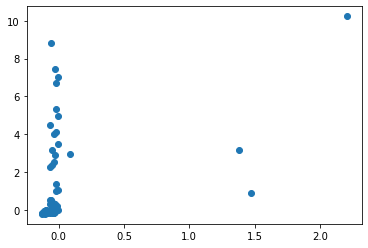

In [45]:
plt.scatter(vectors[:,0],vectors[:,1])

In [46]:
vectors_1 = load_cem_2_vectors_simple(attributes[1],dataset,suffix="",seed=42)

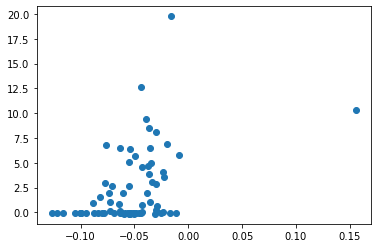

In [47]:
plt.scatter(vectors_1[:,0],vectors_1[:,1])

In [48]:
vectors_2 = load_cem_2_vectors_simple(attributes[2],dataset,suffix="",seed=42)

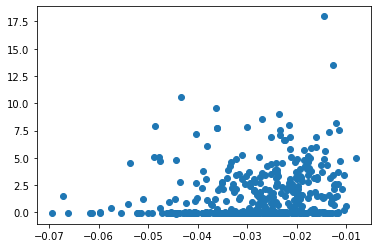

In [49]:
plt.scatter(vectors_2[:,0],vectors_2[:,1])

## VAE Exploration

In [6]:
truthfulness_metric(load_vae_vectors_simple,dataset,attributes,[42])

2023-03-02 12:05:09.578232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64
2023-03-02 12:05:09.578295: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-02 12:05:09.578352: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nemo.cl.cam.ac.uk): /proc/driver/nvidia/version does not exist
2023-03-02 12:05:09.579526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 12:05:12.143154: I tensorflow/compiler/m

(-0.24, 0.0)

In [ ]:
latent_dim = 2
epochs = 10
save_location = ""
concept_alignment = False

In [4]:
np.random.seed(seed)
tf.keras.utils.set_random_seed(seed)

NameError: name 'seed' is not defined

In [5]:
all_data = dataset.get_data(seed=seed,suffix=suffix)
all_files = ['dataset/'+i['img_path'] for i in all_data]
images = np.array([file_to_numpy(i) for i in all_files])
concepts = np.array([i['attribute_label'] for i in all_data])

NameError: name 'dataset' is not defined

In [9]:
all_data_valid = dataset.get_data(seed=seed,suffix=suffix,train=False)
all_files_valid = ['dataset/'+i['img_path'] for i in all_data_valid]
images_valid = np.array([file_to_numpy(i) for i in all_files_valid])
concepts_valid = np.array([i['attribute_label'] for i in all_data_valid])

/auto/homes/njr61/environments/mambaforge/envs/concepts/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
if dataset.experiment_name == "cub":
    # Convert all images to the same size
    size = 64
    images = resize_cub(images,size=size)

2023-03-01 11:16:17.787601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 11:16:17.860816: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
if dataset.experiment_name == "cub":
    # Convert all images to the same size
    size = 64
    images_valid = resize_cub(images_valid,size=size)

In [12]:
vgg16 = VGG16(include_top=False, input_shape=(256, 256, 3), weights='imagenet')

In [13]:
concepts = tf.convert_to_tensor(concepts)
images = tf.convert_to_tensor(images)

### Using libraries

In [14]:
from pythae.trainers import BaseTrainerConfig
from pythae.models import VAE, VAEConfig, BetaVAE, BetaVAEConfig
from pythae.pipelines import TrainingPipeline
from pythae.samplers import NormalSampler
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST
import torch
import torch.nn as nn
from pythae.models.nn.base_architectures import BaseDecoder, BaseEncoder
from pythae.models.base.base_config import BaseAEConfig
from pythae.models.nn.benchmarks.utils import ResBlock
from pythae.models.base.base_utils import ModelOutput

In [15]:
my_training_config = BaseTrainerConfig(
output_dir='my_model',
num_epochs=1,
learning_rate=1e-3,
per_device_train_batch_size=200,
per_device_eval_batch_size=200,
train_dataloader_num_workers=2,
eval_dataloader_num_workers=2,
steps_saving=20,
optimizer_cls="AdamW",
optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.995)},
scheduler_cls="ReduceLROnPlateau",
scheduler_params={"patience": 5, "factor": 0.5}, 
)


In [16]:
my_vae_config = model_config = BetaVAEConfig(
input_dim=(64,64,3),
latent_dim=10,
beta=2.
)


In [17]:
class Encoder_ResNet_VAE_CUB(BaseEncoder):
    def __init__(self, args: BaseAEConfig):
        BaseEncoder.__init__(self)

        self.input_dim = (3, 64,64)
        self.latent_dim = args.latent_dim
        self.n_channels = 3

        layers = nn.ModuleList()

        layers.append(nn.Sequential(nn.Conv2d(self.n_channels, 64, 4, 2, padding=1)))

        layers.append(nn.Sequential(nn.Conv2d(64, 128, 4, 2, padding=1)))

        layers.append(nn.Sequential(nn.Conv2d(128, 128, 3, 2, padding=1)))

        layers.append(
            nn.Sequential(
                ResBlock(in_channels=128, out_channels=32),
                ResBlock(in_channels=128, out_channels=32),
            )
        )

        self.layers = layers
        self.depth = len(layers)

        self.embedding = nn.Linear(128 * 4 * 4 *4, args.latent_dim)
        self.log_var = nn.Linear(128 * 4 * 4 *4, args.latent_dim)

    def forward(self, x, output_layer_levels = None):
        output = ModelOutput()

        max_depth = self.depth

        if output_layer_levels is not None:

            assert all(
                self.depth >= levels > 0 or levels == -1
                for levels in output_layer_levels
            ), (
                f"Cannot output layer deeper than depth ({self.depth})."
                f"Got ({output_layer_levels})."
            )

            if -1 in output_layer_levels:
                max_depth = self.depth
            else:
                max_depth = max(output_layer_levels)

        out = x

        for i in range(max_depth):
            out = self.layers[i](out)

            if output_layer_levels is not None:
                if i + 1 in output_layer_levels:
                    output[f"embedding_layer_{i+1}"] = out
            if i + 1 == self.depth:
                output["embedding"] = self.embedding(out.reshape(x.shape[0], -1))
                output["log_covariance"] = self.log_var(out.reshape(x.shape[0], -1))
                
        return output
class Decoder_ResNet_AE_CUB(BaseDecoder):

    def __init__(self, args: BaseAEConfig):
        BaseDecoder.__init__(self)

        self.input_dim = (3,64,64)
        self.latent_dim = args.latent_dim
        self.n_channels = 3

        layers = nn.ModuleList()

        layers.append(nn.Linear(args.latent_dim, 128 * 4 * 4))

        layers.append(nn.ConvTranspose2d(128, 128, 4, 2, padding=1))

        layers.append(
            nn.Sequential(
                ResBlock(in_channels=128, out_channels=32),
                ResBlock(in_channels=128, out_channels=32),
                ResBlock(in_channels=128, out_channels=32),
                nn.ReLU(),
            )
        )

        layers.append(
            nn.Sequential(
                nn.ConvTranspose2d(128, 64, 4, 2, padding=1, output_padding=0),
                nn.ReLU(),
            )
        )

        layers.append(
            nn.Sequential(
                nn.ConvTranspose2d(64, 64, 4, 2, padding=1, output_padding=0),
                nn.ReLU(),
            )
        )

        
        layers.append(
            nn.Sequential(
                nn.ConvTranspose2d(
                    64, self.n_channels, 4, 2, padding=1, output_padding=0
                ),
                nn.Sigmoid(),
            )
        )

        self.layers = layers
        self.depth = len(layers)

    def forward(self, z, output_layer_levels = None):
        output = ModelOutput()

        max_depth = self.depth

        if output_layer_levels is not None:

            assert all(
                self.depth >= levels > 0 or levels == -1
                for levels in output_layer_levels
            ), (
                f"Cannot output layer deeper than depth ({self.depth})."
                f"Got ({output_layer_levels})"
            )

            if -1 in output_layer_levels:
                max_depth = self.depth
            else:
                max_depth = max(output_layer_levels)

        out = z
        
        for i in range(max_depth):
            out = self.layers[i](out)

            if i == 0:
                out = out.reshape(z.shape[0], 128, 4, 4)                
            if output_layer_levels is not None:
                if i + 1 in output_layer_levels:
                    output[f"reconstruction_layer_{i+1}"] = out

            if i + 1 == self.depth:
                output["reconstruction"] = out
                
        return output


In [18]:
my_vae_model = BetaVAE(
model_config=my_vae_config,
encoder=Encoder_ResNet_VAE_CUB(my_vae_config), 
decoder=Decoder_ResNet_AE_CUB(my_vae_config) 
)


In [19]:
pipeline = TrainingPipeline(
training_config=my_training_config,
model=my_vae_model
)


In [20]:
images_array = np.array(images).transpose(0, 3, 1, 2)
images_valid_array = np.array(images_valid).transpose(0, 3, 1, 2)

In [25]:
torch.cuda.__version__

AttributeError: module 'torch.cuda' has no attribute '__version__'

In [21]:
pipeline(
train_data=images_array,
eval_data=images_valid_array
)


Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created my_model/BetaVAE_training_2023-03-01_11-16-54. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 1
 - per_device_train_batch_size: 200
 - per_device_eval_batch_size: 200
 - checkpoint saving every: 20
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.91, 0.995)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0.05
)
Scheduler: <torch.optim.lr_scheduler.ReduceLROnPlateau object at 0x7f2b3449c390>

Successfully launched training !



Training of epoch 1/1:   0%|          | 0/24 [00:00<?, ?batch/s]

KeyboardInterrupt: 

In [ ]:
my_samper = NormalSampler(
    model=my_vae_model
)

In [ ]:
gen_data = my_samper.sample(
    num_samples=10,
    batch_size=10,
    output_dir=None,
    return_gen=True
)


In [ ]:
for i in range(len(gen_data)):
    plt.figure()
    plt.imshow(np.array(gen_data[i]).transpose(1,2,0))

In [ ]:
for i in range(len(gen_data)):
    plt.figure()
    plt.imshow(images[i])

### Coding from Scratch

In [371]:
latent_dim = 64
decoder_3 = create_decoder(size,3,latent_dim)
encoder_3 = create_encoder(size,3,latent_dim)

In [372]:
def log_hyperbolic_cosine_loss(y_true, y_pred):
    c = 1
    cosh = K.cosh(c * y_pred)
    return K.log(K.mean(cosh - c * y_true * y_pred) + 1e-6)

In [373]:
def perceptual_loss(y_true, y_pred):
    # Get the feature maps of the VGG16 model for the target and generated images
    target_features = vgg16(y_true)
    generated_features = vgg16(y_pred)
    
    # Compute the L2 distance between the feature maps
    loss = tf.keras.backend.mean(tf.keras.backend.square(target_features - generated_features))
    
    return loss


In [374]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder,concept_alignment=False,**kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.concept_alignment = concept_alignment
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        self.concept_loss_tracker = keras.metrics.Mean(name="concept_loss")
        self.kl_weight = 0
        
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            self.concept_loss_tracker,
        ]

    def train_step(self, data):
        if self.concept_alignment:
            data,concepts = data[0]
            concepts = tf.cast(concepts,tf.float32) 
                
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.keras.losses.log_cosh(data, reconstruction)
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            
            concept_loss = 0
            
            if self.concept_alignment:
                masked_concepts = z*concepts
                reconstruction_mask = self.decoder(masked_concepts)
                concept_loss = tf.reduce_mean(
                    tf.reduce_sum(
                        keras.losses.binary_crossentropy(data, reconstruction_mask), axis=(1,2)
                    )
                )



            total_loss = reconstruction_loss + self.kl_weight*kl_loss + concept_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        self.concept_loss_tracker.update_state(concept_loss)
                
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "concept_loss": self.concept_loss_tracker.result(),
        }
    

In [375]:
vae = VAE(encoder_3, decoder_3,concept_alignment=concept_alignment)
vae.compile(optimizer=keras.optimizers.Adam())

In [376]:
vae.fit(images, epochs=20, batch_size=128)

Epoch 1/20
38/38 [==============================] - 30s 754ms/step - loss: 0.0264 - reconstruction_loss: 0.0249 - kl_loss: 47.8137 - concept_loss: 0.0000e+00
Epoch 2/20
38/38 [==============================] - 30s 774ms/step - loss: 0.0219 - reconstruction_loss: 0.0215 - kl_loss: 97.7688 - concept_loss: 0.0000e+00
Epoch 3/20
38/38 [==============================] - 29s 775ms/step - loss: 0.0206 - reconstruction_loss: 0.0205 - kl_loss: 133.2406 - concept_loss: 0.0000e+00
Epoch 4/20
38/38 [==============================] - 29s 772ms/step - loss: 0.0192 - reconstruction_loss: 0.0186 - kl_loss: 212.7622 - concept_loss: 0.0000e+00
Epoch 5/20
38/38 [==============================] - 30s 791ms/step - loss: 0.0167 - reconstruction_loss: 0.0159 - kl_loss: 305.6664 - concept_loss: 0.0000e+00
Epoch 6/20
38/38 [==============================] - 29s 766ms/step - loss: 0.0142 - reconstruction_loss: 0.0141 - kl_loss: 354.7348 - concept_loss: 0.0000e+00
Epoch 7/20
38/38 [==============================

In [421]:
predicted_images = decoder_3(np.random.random((1,64)))[0]

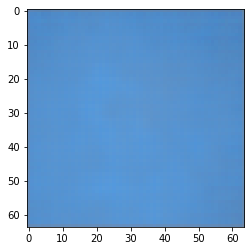

In [422]:
plt.imshow(predicted_images)

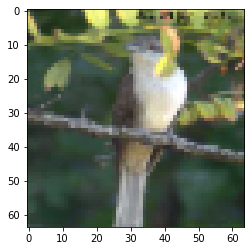

In [381]:
plt.imshow(images[0])

In [384]:
mu, sigma, encoded_image = encoder_3(np.array([images[0]]))

In [417]:
sample = np.random.normal(mu, np.sqrt(np.exp(sigma)))

In [418]:
decoded_image = decoder_3(sample)

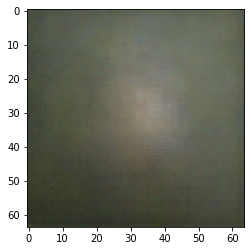

In [419]:
plt.imshow(decoded_image[0])